In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [2]:
df1 = pd.read_csv('../Data/airline_passengers.csv', index_col=0, parse_dates=True)
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', index_col=0, parse_dates=True)

In [3]:
df1.index.freq = 'MS'
df2.index.freq = 'D'


In [4]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


# Test for Stationarity

In [6]:
def full_adfuller_test(series, title=''):
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(series,autolag='AIC')
    index = ['ADF test statistic','p-value','# lags used','# observations']
    result = pd.Series(dftest[:4], index=index)
    # critical values are in dict form hence the following steps to unpack the data
    for key,val in dftest[4].items():
        result['Critical Value ({})'.format(key)] = val
    print(f'Augmented Dickey-Fuller Test: {title}')
    print(result.to_string())     # to_string will remove float64
    print()
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
full_adfuller_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
full_adfuller_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Rolling STD and averages

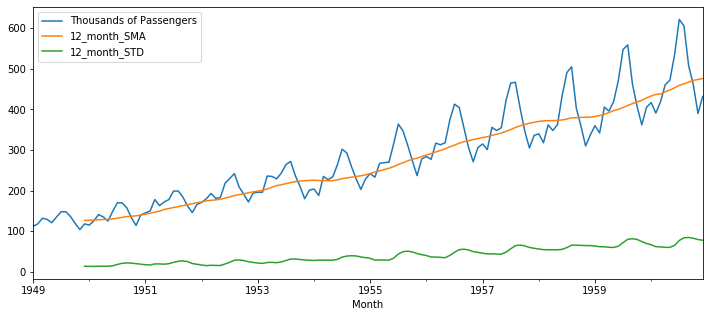

In [9]:
df1['12_month_SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12_month_STD'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1.plot();

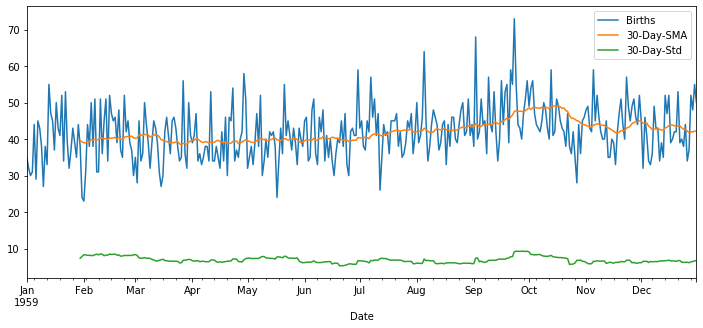

In [10]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2.plot();

# Granger Casuality Test

In [11]:
df3 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)


In [12]:
df3.index.freq='MS'

In [13]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


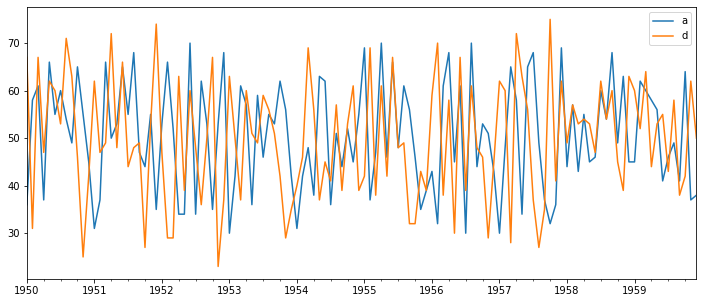

In [14]:
df3[['a', 'd']].plot();

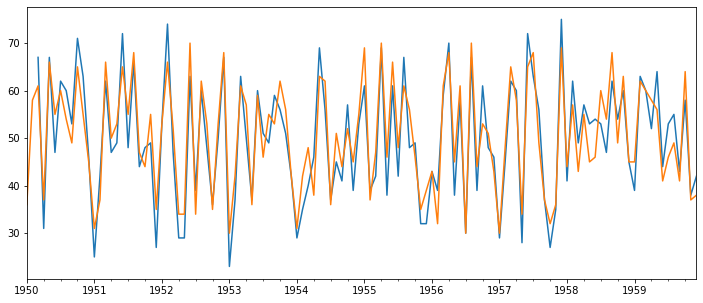

In [15]:
df3['d'].shift(2).plot()
df3['a'].plot();

# a is looking to be correlated to d

In [16]:
grangercausalitytests(df3[['a','d']], maxlag=3);

# highly correlated since p values are lower than 0.05


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [17]:
grangercausalitytests(df3[['a','c']], maxlag=3);

# no correlations since p values are higher than 0.05


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.1325  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1325  , p=0.7159  , df=1
parameter F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=1.6940  , p=0.4287  , df=2
likelihood ratio test: chi2=1.6820  , p=0.4313  , df=2
parameter F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.4255  , p=0.6996  , df=3
likelihood ratio test: chi2=1.4169  , p=0.7016  , df=3
parameter F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3


# Evaluation Metrics

In [18]:
np.random.seed(42)
df4 = pd.DataFrame(np.random.randint(20,30, (50,2)), columns=['test', 'predictions'])
df4.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


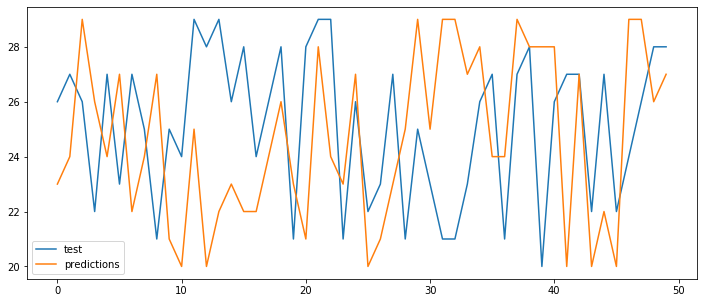

In [19]:
df4.plot();

In [20]:
print('Mean squared error:\t {}'.format(mse(df4['test'], df4['predictions'])))
print('Root Mean squared error: {}'.format(rmse(df4['test'], df4['predictions'])))
print('Mean Absolute error:\t {}'.format(meanabs(df4['test'], df4['predictions'])))

Mean squared error:	 17.02
Root Mean squared error: 4.125530268947253
Mean Absolute error:	 3.54


# Exposing Seasonality with Month and Quarter Plots

In [21]:
df1 = df1.drop(['12_month_SMA', '12_month_STD'], axis=1)

In [22]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

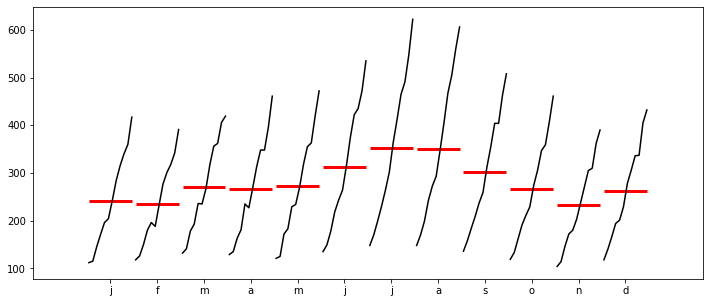

In [24]:
month_plot(df1);

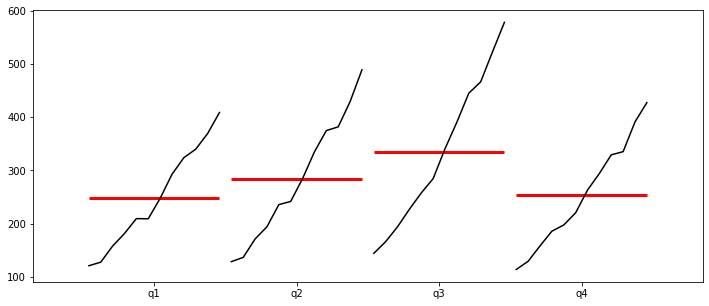

In [25]:
quarter_plot(df1['Thousands of Passengers'].resample('Q').mean());

In [26]:
df5 = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
# quarter_plot(df3['realgdp']);

In [27]:
df5.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


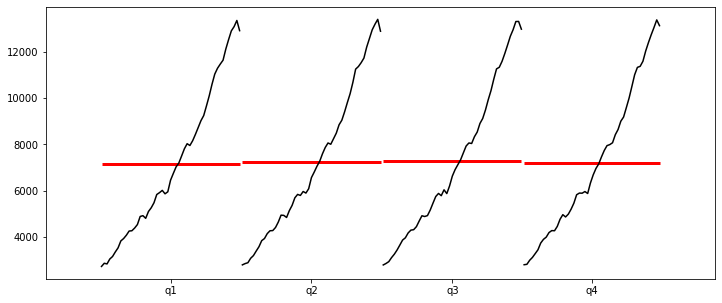

In [28]:
quarter_plot(df5['realgdp']);